In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../../../../Data/macro_features_and_real_oil_prices_log_tranferred_dropped_Nan_skipped_neg_and_zeros_for_log.csv', skiprows=1)
# Drop the "0" column (unnecessary index column)
df = df.drop(columns=['0'])

# drop the original date column
df = df.drop(columns=['date'])

# See if I'm doing this right
df.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx,Real Oil Prices
0,12.962951,12.750812,5.803950,19.534471,17.325209,5.952564,6.137924,6.101171,6.327298,5.854031,...,5.861682,3.571677,3.772941,3.498251,6.104337,15.967271,17.533756,9.539485,4.091742,13.715729
1,12.965336,12.751983,5.806582,19.540266,17.320880,5.964607,6.150103,6.113980,6.340179,5.883401,...,5.865968,3.575312,3.782409,3.500802,6.247928,15.942881,17.542367,9.549875,4.019942,13.601725
2,12.970718,12.755952,5.807793,19.549848,17.329560,5.975704,6.160908,6.124948,6.353748,5.910003,...,5.871375,3.580145,3.783457,3.505891,6.270529,15.972082,17.542547,9.562213,4.016897,14.512195
3,12.978406,12.763876,5.815217,19.537241,17.337448,5.980389,6.168790,6.133329,6.363083,5.954359,...,5.873100,3.581351,3.783457,3.509696,6.307429,15.924905,17.543025,9.580477,3.880490,15.017895
4,12.984426,12.770292,5.819106,19.552370,17.341493,5.981250,6.165329,6.128931,6.356100,5.934182,...,5.875166,3.586164,3.794936,3.512227,6.329124,15.943545,17.556218,9.597480,3.882946,15.981442


In [3]:
# Check for null values
df.info()
print(df.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Columns: 127 entries, RPI to Real Oil Prices
dtypes: float64(127)
memory usage: 370.2 KB
RPI                373
W875RX1            373
DPCERA3M086SBEA    373
CMRMTSPLx          373
RETAILx            373
                  ... 
DTCOLNVHFNM        373
DTCTHFNM           373
INVEST             373
VIXCLSx            373
Real Oil Prices    373
Length: 127, dtype: int64


### Random Forest

#### 1. Splitting Data into Train and Test Sets

In [4]:
from sklearn.model_selection import train_test_split

# 'Real Oil Prices' is the target column
X = df.drop('Real Oil Prices', axis=1)
y = df['Real Oil Prices']

# Split the data into training and testing sets
# 80% of the data will be used for training, 20% for testing (0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 2. Creating and Training the Random Forest Regressor

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### 3. Making Predictions and Evaluating the Model

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)


print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")


Mean Absolute Error: 1.5770013591932748
Mean Squared Error: 6.427038585328197
Root Mean Squared Error: 2.5351604654002076
R^2 Score: 0.9558637202859677


#### 4. Feature Importance

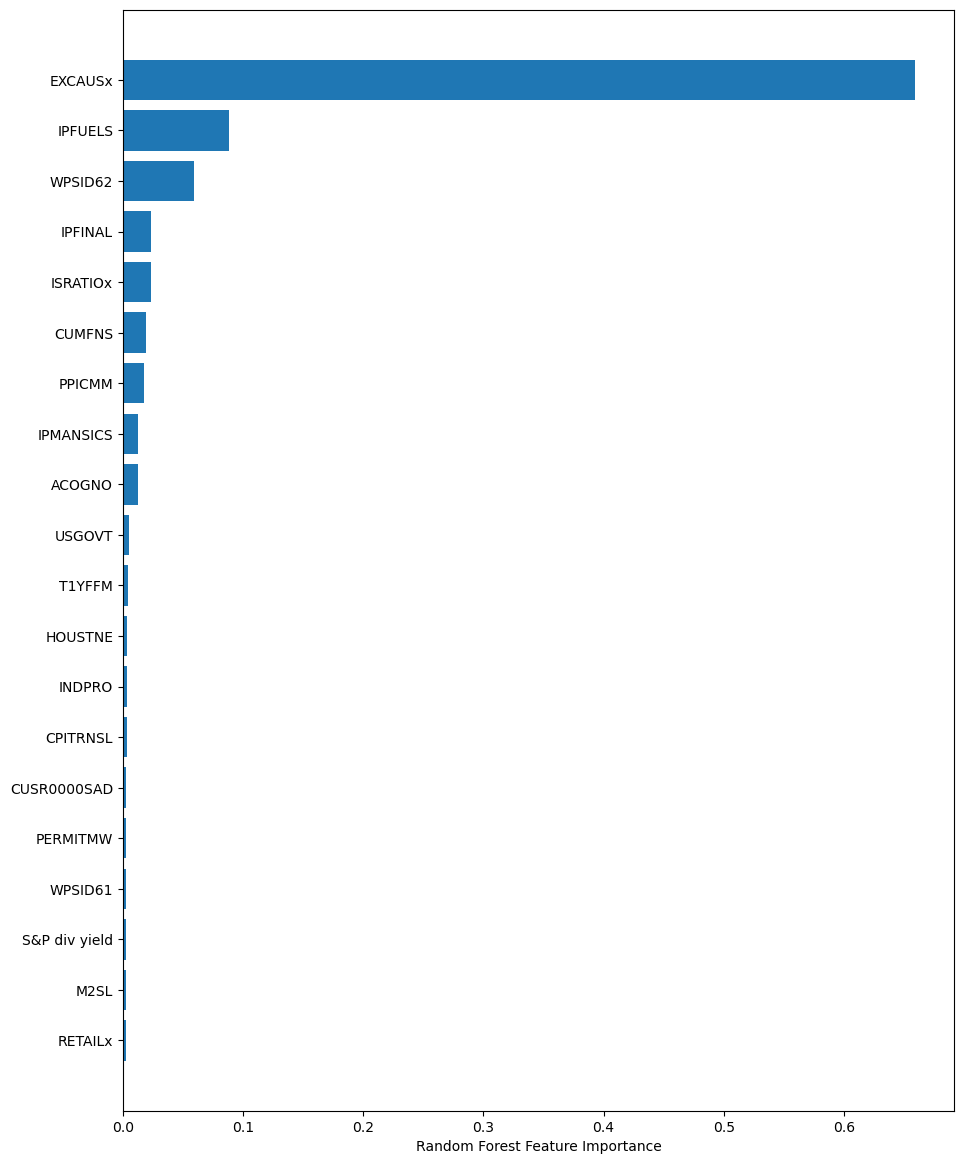

In [7]:
importances = model.feature_importances_
features = X.columns

# Sorting feature importances
sorted_idx = importances.argsort()

# Selecting top 20
top_20_idx = sorted_idx[-20:]

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))
plt.barh(range(20), importances[top_20_idx])
plt.yticks(range(20), features[top_20_idx], fontsize=10) 
plt.xlabel("Random Forest Feature Importance")
plt.tight_layout(pad=2) 
plt.show()

### Learning Curve Attempt

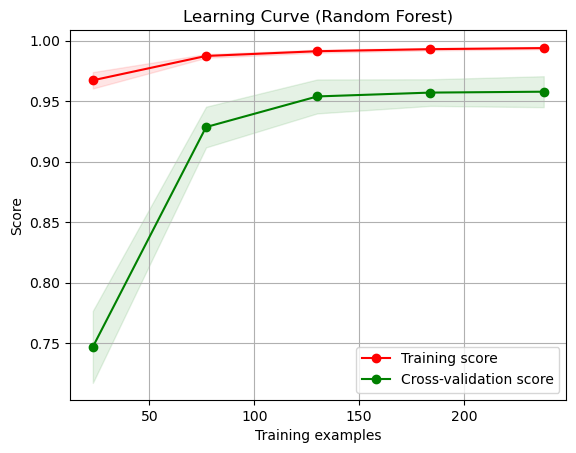

In [8]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

plot_learning_curve(model, "Learning Curve (Random Forest)", X_train, y_train, cv=5)
plt.show()

## Actual Vs. (Perfect) Predicted

- __Scatter Points (Blue)__: Each point represents a single observation. The x-coordinate of the point is the actual oil price, and the y-coordinate is the predicted oil price for that observation.

- __Perfect Prediction Line (Red)__: This is a diagonal line where the predicted values would lie if they were exactly equal to the actual values. Any point that lies on this line had its value predicted perfectly by the model.

- __Mean Prediction Line (Green)__: This is a horizontal line that represents the average of all predicted values. It gives a reference to see how individual predictions deviate from the mean prediction.

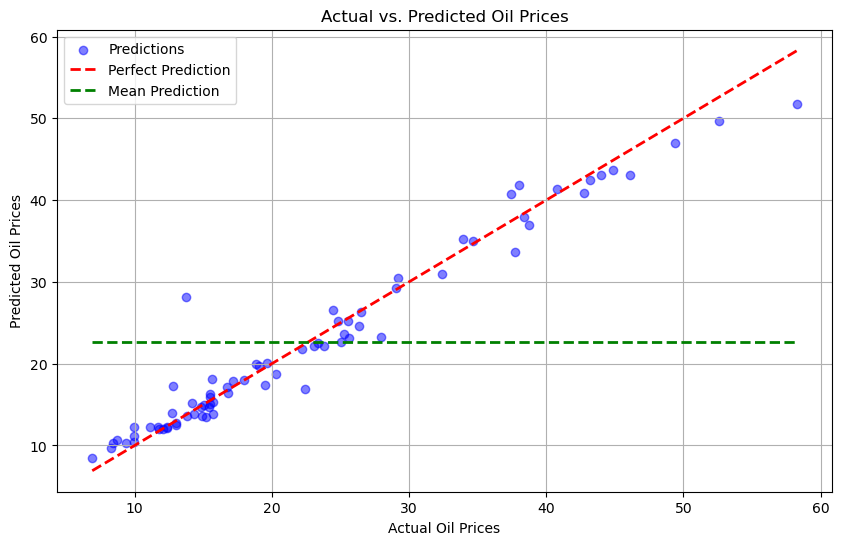

In [9]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, label='Predictions', color='blue')

# Perfect Prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red', label='Perfect Prediction')

# Mean Prediction line
plt.plot([y_test.min(), y_test.max()], [predictions.mean(), predictions.mean()], '--', lw=2, color='green', label='Mean Prediction')

plt.xlabel('Actual Oil Prices')
plt.ylabel('Predicted Oil Prices')
plt.title('Actual vs. Predicted Oil Prices')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

### Actual vs Predicted

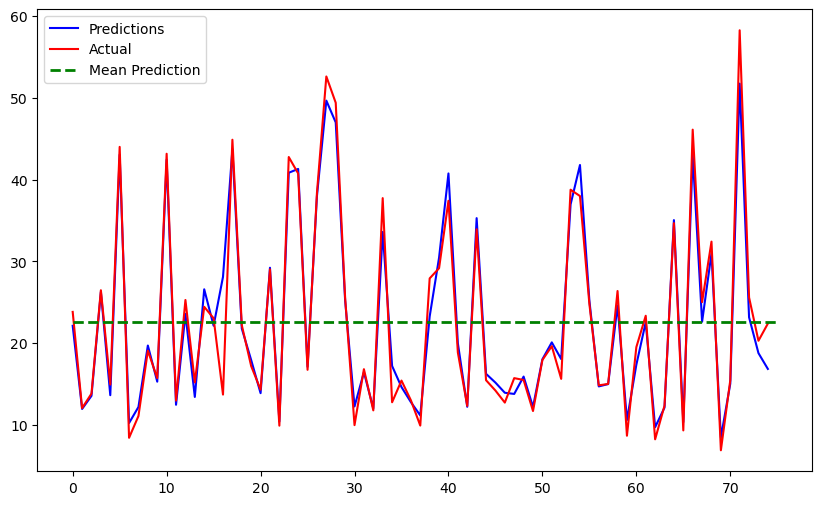

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(predictions, label='Predictions', color='blue')
plt.plot(y_test.values, label='Actual', color='red')

# Mean Prediction line
plt.plot([0, len(y_test)], [predictions.mean(), predictions.mean()], '--', lw=2, color='green', label='Mean Prediction')

plt.legend(loc='upper left')
plt.show()